## Aim : Maximize agricultural yield by recommending appropriate crops

### Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

#### You can find the dataset at https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset?resource=download

### Context This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

#### Data fields 
N - ratio of Nitrogen content in soil \
P - ratio of Phosphorous content in soil \
K - ratio of Potassium content in soil \
temperature - temperature in degree Celsius\ 
humidity - relative humidity in % \
ph - ph value of the soil\
rainfall - rainfall in mm 

### Import Dependencies

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.linear_model as ln

In [8]:
cr_df = pd.read_csv("Crop_recommendation.csv")
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
cr_df.describe() # Get Basic Summary of the data

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


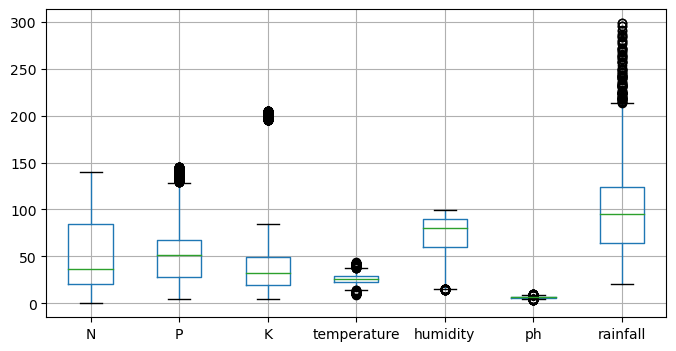

In [13]:
plt.figure(figsize=(8,4))
cr_df.boxplot() # Check Data Distribution and outliers
plt.show()

In [14]:
# Check Label Values
cr_df.label.value_counts() # we have equally distributed data 

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

C:\Users\visha\AppData\Local\Temp\ipykernel_19228\2771725089.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cr_df.corr())


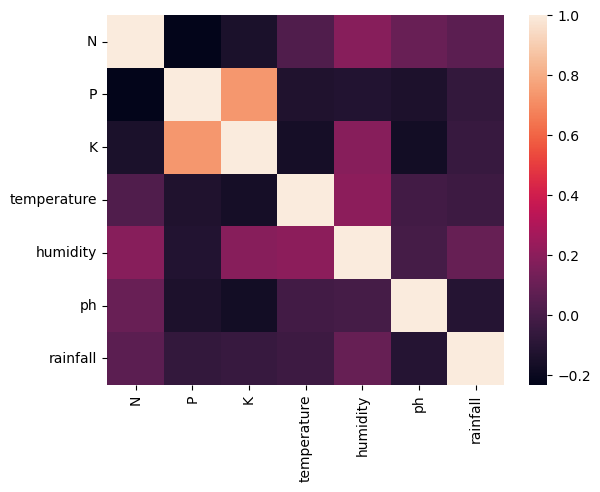

In [17]:
# Next perform Basic EDA between labels and other paramenters
sns.heatmap(cr_df.corr())
plt.show()
# From this Heat map we can see that Phosphorous and Potassium are highly correlated. 
# We can check their relationsip with labels before deciding to remove either 1 of them


In [18]:
# Next lets plot average/min/max values of all predictors against the labels(Response Variable)



C:\Users\visha\AppData\Local\Temp\ipykernel_19228\819439543.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr_df.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [ ]:
# Check Multicollinearity and remove parameters
